In [1]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier



Mounted at /content/drive


In [2]:
path='/content/drive/MyDrive/Proyecto Imagenes/Images'
os.chdir(path)
!pwd

/content/drive/MyDrive/Proyecto Imagenes/Images


In [3]:
def FacialRecognition(image):
  # Load data
  
  lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

  _, h, w = lfw_dataset.images.shape
  X = lfw_dataset.data
  y = lfw_dataset.target
  target_names = lfw_dataset.target_names

  # split into a training and testing set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  # Compute a PCA 
  n_components = 100
  pca = PCA(n_components=n_components, whiten=True).fit(X_train)

  # apply PCA transformation
  X_train_pca = pca.transform(X_train)

  # train a neural network
  print("Fitting the classifier to the training set")
  clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

  dim = (47, 62)
  imgReS = cv2.resize(image, dim)
  imgReShape =  imgReS.reshape(1,2914)

  imagen_pca = pca.transform(imgReShape)
  ximagen = imagen_pca
  

  personName = input("Name: ")
  
  #Makes the prediction
  newPrediction = clf.predict(ximagen)
  PredictedName = target_names[newPrediction]
  listToStr = ' '.join([str(element) for element in PredictedName]) 
  
  print(newPrediction)
  plt.figure(figsize=(12,4))
  plt.subplot(121), plt.imshow(image,cmap='gray'), plt.title('Real name: '+ personName+'\n\n PredictedName: '+listToStr)
  plt.xticks([]), plt.yticks([])


  plt.show()

Fitting the classifier to the training set
Iteration 1, loss = 1.48950013
Validation score: 0.587500
Iteration 2, loss = 1.10303559
Validation score: 0.625000
Iteration 3, loss = 0.88024392
Validation score: 0.687500
Iteration 4, loss = 0.69496084
Validation score: 0.762500
Iteration 5, loss = 0.54484154
Validation score: 0.825000
Iteration 6, loss = 0.43432881
Validation score: 0.862500
Iteration 7, loss = 0.35074584
Validation score: 0.875000
Iteration 8, loss = 0.28857196
Validation score: 0.900000
Iteration 9, loss = 0.23862047
Validation score: 0.875000
Iteration 10, loss = 0.19784529
Validation score: 0.887500
Iteration 11, loss = 0.16552234
Validation score: 0.900000
Iteration 12, loss = 0.13970580
Validation score: 0.900000
Iteration 13, loss = 0.11872298
Validation score: 0.900000
Iteration 14, loss = 0.10200481
Validation score: 0.900000
Iteration 15, loss = 0.08797663
Validation score: 0.900000
Iteration 16, loss = 0.07651239
Validation score: 0.900000
Iteration 17, loss = 0

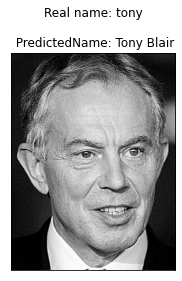

In [6]:
#Receive and send the photo
image = cv2.imread('tony.jpg', cv2.IMREAD_GRAYSCALE)

FacialRecognition(image)